In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import copy as cp
from keras.preprocessing.sequence import TimeseriesGenerator
import statistics 
from scipy.ndimage.filters import uniform_filter1d
import statistics

In [5]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random as rd

In [6]:
col=columns=["Nom_fichier","Fréquence_échantillonnage","Nbr_voix","Amplitude_relative_des_voix","Présence_bruit","Effet_sonores"]

In [7]:
df_y = pd.read_csv('/content/drive/MyDrive/document projet SIA/df_info.csv',index_col=0)
df_x_comp = pd.read_csv("/content/drive/MyDrive/document projet SIA/df_signal.csv",index_col=0)

In [8]:
df_y.head(-1)

,Nom_fichier,Fréquence_échantillonnage,Nbr_voix,Amplitude_relative_des_voix,Présence_bruit,Effet_sonores,Index_des_voix
1,06_CARNOT___e_Rose_et_immportelle.wav,11025,1,[1],Faux,aucun,[0]
2,06_CARNOT___e_Rose_et_immportelle.wav,11025,1,[1],Faux,aucun,[1]
3,06_CARNOT___e_Rose_et_immportelle.wav,11025,1,[1],Faux,aucun,[2]
4,Alfred_de_Musset_l_Anglais__mangeur_d_opium_00...,11025,1,[1],Faux,aucun,[3]
5,Alfred_de_Musset_l_Anglais__mangeur_d_opium_00...,11025,1,[1],Faux,aucun,[4]
...,...,...,...,...,...,...,...
4995,Mélange_audio_4324,11025,2,[0.50064311 0.49935689],Faux,"['Filtre_passe_bas', 'Pitch_shift_8/2']","[164, 384]"
4996,Mélange_audio_4325,11025,2,[0.54015631 0.45984369],Faux,"['Pitch_shift_-7/2', 'aucun']","[471, 61]"
4997,Mélange_audio_4326,11025,1,[1.],Faux,"['Filtre_passe_bas', 'Pitch_shift_-3/2']",[158]
4998,Mélange_audio_4327,11025,2,[0.44783673 0.55216327],Faux,"['Pitch_shift_8/2', 'Pitch_shift_12/2']","[289, 516]"


In [9]:
df_x_comp.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,33065,33066,33067,33068,33069,33070,33071,33072,33073,33074
0,0.034239,0.033605,0.033644,0.032108,0.032511,0.031744,0.034066,0.033049,0.032857,0.035371,...,0.030995,0.030746,0.032319,0.030323,0.031283,0.030726,0.030918,0.032396,0.033452,0.032338
1,0.035409,0.034085,0.030899,0.032818,0.032569,0.033029,0.032530,0.033432,0.032473,0.033548,...,0.032396,0.033317,0.033567,0.032012,0.031398,0.030573,0.032818,0.032799,0.034181,0.034565
2,0.034277,0.034718,0.033931,0.035831,0.033816,0.031609,0.032166,0.031053,0.034008,0.034488,...,0.034507,0.033720,0.032684,0.032914,0.032876,0.033375,0.032147,0.033145,0.031897,0.029978
3,0.025246,0.007933,-0.023737,-0.043484,-0.046195,-0.053835,-0.071302,-0.083840,-0.082762,-0.080328,...,-0.004020,-0.006269,-0.003281,-0.003866,-0.000970,0.002357,0.004421,0.009689,0.010336,0.014957
4,0.015727,0.017483,0.021518,0.020779,0.023490,0.024507,0.025616,0.026632,0.026386,0.028080,...,0.010274,0.010305,0.010490,0.010551,0.010305,0.009966,0.010212,0.010243,0.010336,0.010028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.041144,-0.040410,-0.041516,-0.041574,-0.042019,-0.041062,-0.038470,-0.035419,-0.030615,-0.024053,...,0.073897,0.081727,0.080798,0.073412,0.061207,0.048601,0.036573,0.027134,0.020973,0.015757
4996,-0.108985,-0.114409,-0.113131,-0.109143,-0.108075,-0.110276,-0.112235,-0.104634,-0.107736,-0.110267,...,-0.167269,-0.096627,-0.051640,-0.047257,-0.064128,-0.079259,-0.089527,-0.102646,-0.117240,-0.091294
4997,0.038019,0.108648,0.170144,0.214026,0.234799,0.230252,0.201056,0.149961,0.080972,-0.001178,...,-0.139637,-0.139697,-0.139425,-0.138836,-0.138021,-0.137115,-0.136256,-0.135542,-0.135020,-0.134686
4998,0.033266,0.049662,0.049858,0.034098,0.019815,0.060741,0.057763,0.042579,0.042142,0.047189,...,-0.009604,0.010341,-0.011068,0.002655,-0.004406,-0.003095,0.003320,0.004539,0.017584,0.003380


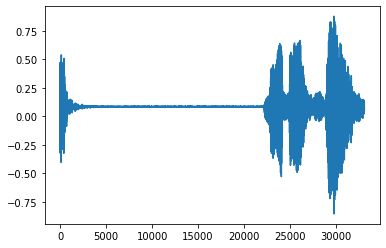

In [10]:
u=300-96*2
X=list(df_x_comp.iloc[u,:])
plt.plot(X)

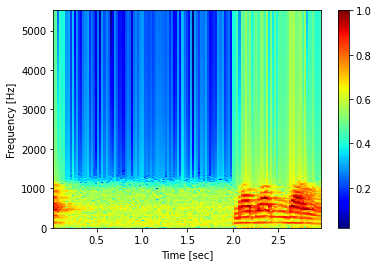

Nom_fichier                    BERNNIS_e_MADAME_DARGENT.wav
Fréquence_échantillonnage                             11025
Nbr_voix                                                  1
Amplitude_relative_des_voix                             [1]
Présence_bruit                                         Faux
Effet_sonores                              Filtre_passe_bas
Index_des_voix                                        [108]
Name: 109, dtype: object

In [11]:
X=np.array(X)
f, t, Sxx = signal.spectrogram(X, fs=11025,nfft=2**9,noverlap=2**8,window="hamming",nperseg=2**9)
inter=20*np.log10(cp.deepcopy(Sxx))
ma=np.max(inter)
mi=np.min(inter)
inter=(inter-mi)/(ma-mi)
plt.pcolormesh(t, f, inter,cmap='jet')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
df_y.iloc[u,:]

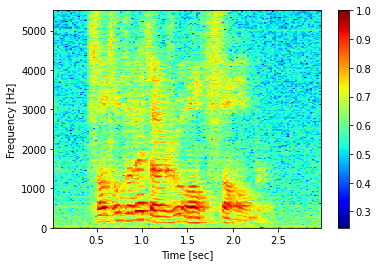

Nom_fichier                    06_CARNOT___e_Rose_et_immportelle.wav
Fréquence_échantillonnage                                      11025
Nbr_voix                                                           1
Amplitude_relative_des_voix                                      [1]
Présence_bruit                                                  Faux
Effet_sonores                                                  aucun
Index_des_voix                                                   [1]
Name: 2, dtype: object


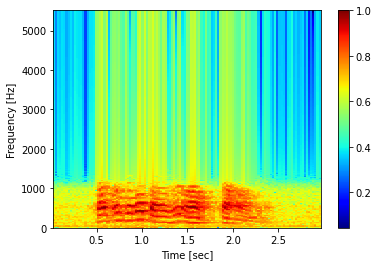

Nom_fichier                    06_CARNOT___e_Rose_et_immportelle.wav
Fréquence_échantillonnage                                      11025
Nbr_voix                                                           1
Amplitude_relative_des_voix                                      [1]
Présence_bruit                                                  Faux
Effet_sonores                                       Filtre_passe_bas
Index_des_voix                                                  [97]
Name: 98, dtype: object


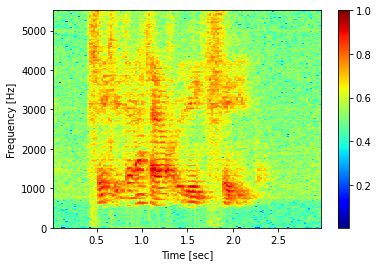

Nom_fichier                    06_CARNOT___e_Rose_et_immportelle.wav
Fréquence_échantillonnage                                      11025
Nbr_voix                                                           1
Amplitude_relative_des_voix                                      [1]
Présence_bruit                                                  Faux
Effet_sonores                                      Filtre_passe_haut
Index_des_voix                                                 [193]
Name: 194, dtype: object


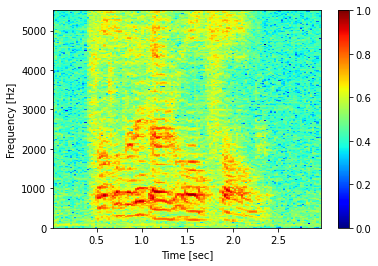

Nom_fichier                    06_CARNOT___e_Rose_et_immportelle.wav
Fréquence_échantillonnage                                      11025
Nbr_voix                                                           1
Amplitude_relative_des_voix                                      [1]
Présence_bruit                                                  Faux
Effet_sonores                                        Pitch_shift_8/2
Index_des_voix                                                 [289]
Name: 290, dtype: object


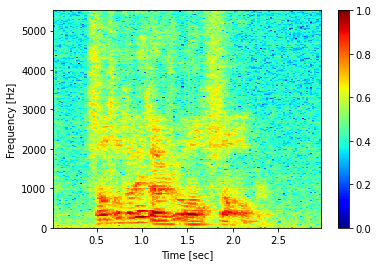

Nom_fichier                    06_CARNOT___e_Rose_et_immportelle.wav
Fréquence_échantillonnage                                      11025
Nbr_voix                                                           1
Amplitude_relative_des_voix                                      [1]
Présence_bruit                                                  Faux
Effet_sonores                                       Pitch_shift_-7/2
Index_des_voix                                                 [385]
Name: 386, dtype: object


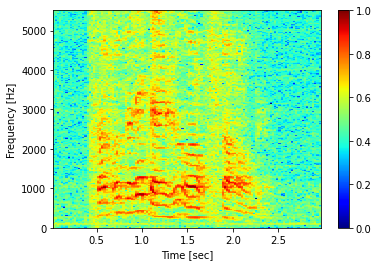

Nom_fichier                    06_CARNOT___e_Rose_et_immportelle.wav
Fréquence_échantillonnage                                      11025
Nbr_voix                                                           1
Amplitude_relative_des_voix                                      [1]
Présence_bruit                                                  Faux
Effet_sonores                                       Pitch_shift_12/2
Index_des_voix                                                 [481]
Name: 482, dtype: object


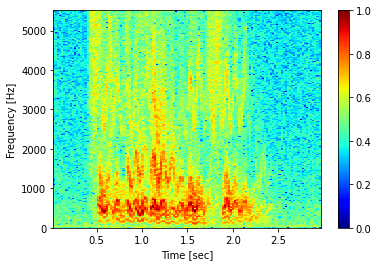

Nom_fichier                    06_CARNOT___e_Rose_et_immportelle.wav
Fréquence_échantillonnage                                      11025
Nbr_voix                                                           1
Amplitude_relative_des_voix                                      [1]
Présence_bruit                                                  Faux
Effet_sonores                                                Vibrato
Index_des_voix                                                 [577]
Name: 578, dtype: object


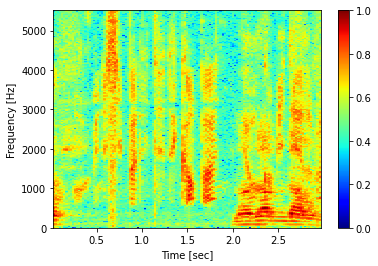

Nom_fichier                                             Mélange_audio_3
Fréquence_échantillonnage                                         11025
Nbr_voix                                                              1
Amplitude_relative_des_voix                                        [1.]
Présence_bruit                                                     Faux
Effet_sonores                  ['Filtre_passe_bas', 'Pitch_shift_-2/2']
Index_des_voix                                                    [115]
Name: 674, dtype: object


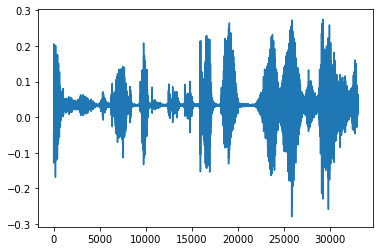

In [12]:
for j in range(0,700,96):
  u=1
  X1=list(df_x_comp.iloc[u+j,:])
  X1=np.array(X1)
  f, t, Sxx = signal.spectrogram(X1, fs=11025,nfft=2**9,noverlap=2**8,window="hamming",nperseg=2**9)
  inter=20*np.log10(cp.deepcopy(Sxx))
  ma=np.max(inter)
  mi=np.min(inter)
  inter=(inter-mi)/(ma-mi)
  plt.pcolormesh(t, f, inter,cmap='jet')
  plt.colorbar()
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()
  print(df_y.iloc[u+j,:])
plt.plot(X1)

In [13]:
Spectro=np.zeros((257,128,5000),dtype=np.float32)
for j in range(5000):
  f, t, Sxx = signal.spectrogram(df_x_comp.iloc[j,:], fs=11025,nfft=2**9,noverlap=2**8,window="hamming",nperseg=2**9)
  inter=20*np.log10(cp.deepcopy(Sxx+0.000001))
  ma=np.max(inter)
  mi=np.min(inter)
  inter=(inter-mi)/(ma-mi)
  Spectro[:,:,j]=inter

In [14]:
import pywt
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split


In [25]:
cnn2D = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(10, 10), activation='relu', input_shape=(257, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')])
cnn2D.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
y1=np.array(df_y.iloc[:5000,2])
X1=np.array(df_x_comp.iloc[:5000,:])

In [17]:
def One_hot_label(Y,N_class):
  N=len(Y)
  Y_out=np.zeros((N,N_class))
  print(Y_out.shape)
  for j in range(N):
    Y_out[j,Y[j]-1]=1
  return(Y_out)
Yout1=One_hot_label(y1,2)

(5000, 2)


In [18]:
Spectro=Spectro.reshape(5000,257,128)

In [19]:
X_train, X_test, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2,shuffle=True)

In [20]:
y_train=One_hot_label(y_train1,2)
y_test=One_hot_label(y_test1,2)

(4000, 2)
(1000, 2)


In [21]:
X_spectro_train,X_spectro_test,y_spectro_train1,y_spectro_test1=train_test_split(Spectro.reshape(5000,257,128), y1, test_size=0.2,shuffle=True)

In [22]:
y_spectro_train=One_hot_label(y_spectro_train1,2)
y_spectro_test=One_hot_label(y_spectro_test1,2)

(4000, 2)
(1000, 2)


In [26]:
cnn2D.fit(X_spectro_train,y_spectro_train,epochs=40,verbose=1,batch_size=100,validation_data=(X_spectro_test,y_spectro_test))

Epoch 1/40
40/40 [==============================] - 7s 157ms/step - loss: 0.6344 - accuracy: 0.5965 - val_loss: 0.6184 - val_accuracy: 0.6280
Epoch 2/40
40/40 [==============================] - 5s 126ms/step - loss: 0.6169 - accuracy: 0.5982 - val_loss: 0.6173 - val_accuracy: 0.6280
Epoch 3/40
40/40 [==============================] - 5s 115ms/step - loss: 0.6161 - accuracy: 0.5982 - val_loss: 0.6161 - val_accuracy: 0.6280
Epoch 4/40
40/40 [==============================] - 5s 116ms/step - loss: 0.6166 - accuracy: 0.5982 - val_loss: 0.6116 - val_accuracy: 0.6280
Epoch 5/40
40/40 [==============================] - 5s 116ms/step - loss: 0.6143 - accuracy: 0.5982 - val_loss: 0.6115 - val_accuracy: 0.6280
Epoch 6/40
40/40 [==============================] - 5s 116ms/step - loss: 0.6181 - accuracy: 0.5982 - val_loss: 0.6105 - val_accuracy: 0.6280
Epoch 7/40
40/40 [==============================] - 5s 114ms/step - loss: 0.6150 - accuracy: 0.5982 - val_loss: 0.6122 - val_accuracy: 0.6280
Epoch 

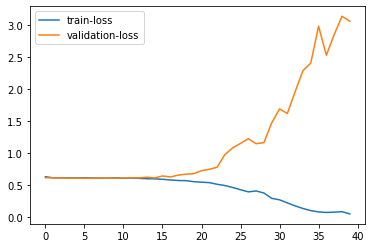

In [27]:
loss_per_epoch = cnn2D.history.history['loss']
loss_vall=cnn2D.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

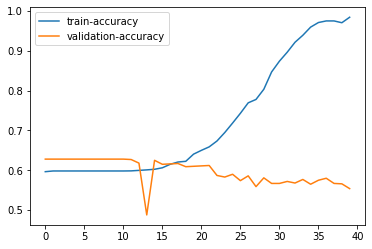

In [28]:
acc_per_epoch = cnn2D.history.history['accuracy']
acc_vall=cnn2D.history.history['val_accuracy']
plt.plot(range(len(acc_per_epoch)),acc_per_epoch,label="train-accuracy")
plt.plot(range(len(acc_vall)),acc_vall,label="validation-accuracy")
plt.legend()

In [29]:
u=np.array([0,2,3,16,3])
i=np.where(u==2)


In [30]:
from sklearn.metrics import confusion_matrix

def One_hot_to_number(y_pred):
  N=len(y_pred)
  y=[]
  for j in range(N):
    u=y_pred[j,:]
    a=np.where(u==np.max(u))[0][0]
    y.append(a+1)
  return(y)
Y_pred=One_hot_to_number(cnn2D.predict(X_spectro_train))
Y_pred_test=One_hot_to_number(cnn2D.predict(X_spectro_test))
print(Y_pred)
print(y_spectro_train1)
    

32/32 [==============================] - 1s 15ms/step
[1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 

In [31]:
confusion_matrix(Y_pred_test,y_spectro_test1)

array([[379, 197],
       [249, 175]])

In [32]:
CNN1D = Sequential()
CNN1D.add(Conv1D(filters=16, kernel_size=4, activation='relu', input_shape=(33075,1)))
CNN1D.add(MaxPooling1D(pool_size=2))
CNN1D.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNN1D.add(MaxPooling1D(pool_size=2))
CNN1D.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
CNN1D.add(MaxPooling1D(pool_size=2))
CNN1D.add(Flatten())
CNN1D.add(Dense(50, activation='relu'))
CNN1D.add(Dense(2,activation="softmax"))
CNN1D.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
CNN1D.fit(X_train,y_train,epochs=40,verbose=1,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/40
40/40 [==============================] - 6s 139ms/step - loss: 0.7003 - accuracy: 0.5795 - val_loss: 0.6705 - val_accuracy: 0.6060
Epoch 2/40
40/40 [==============================] - 5s 129ms/step - loss: 0.6680 - accuracy: 0.6037 - val_loss: 0.6704 - val_accuracy: 0.6060
Epoch 3/40
40/40 [==============================] - 5s 129ms/step - loss: 0.6640 - accuracy: 0.6037 - val_loss: 0.6755 - val_accuracy: 0.6060
Epoch 4/40
40/40 [==============================] - 5s 129ms/step - loss: 0.6531 - accuracy: 0.6037 - val_loss: 0.6872 - val_accuracy: 0.6060
Epoch 5/40
40/40 [==============================] - 5s 129ms/step - loss: 0.6451 - accuracy: 0.6037 - val_loss: 0.6927 - val_accuracy: 0.6060
Epoch 6/40
40/40 [==============================] - 5s 130ms/step - loss: 0.6375 - accuracy: 0.6053 - val_loss: 0.6999 - val_accuracy: 0.5520
Epoch 7/40
40/40 [==============================] - 5s 132ms/step - loss: 0.6331 - accuracy: 0.6300 - val_loss: 0.7100 - val_accuracy: 0.5610
Epoch 

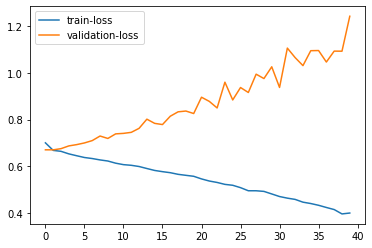

In [34]:
loss_per_epoch = CNN1D.history.history['loss']
loss_vall=CNN1D.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

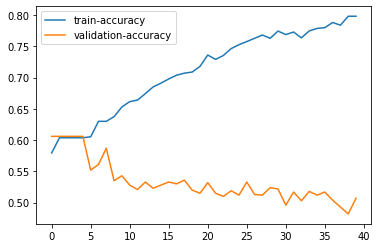

In [35]:
acc_per_epoch = CNN1D.history.history['accuracy']
acc_vall=CNN1D.history.history['val_accuracy']
plt.plot(range(len(acc_per_epoch)),acc_per_epoch,label="train-accuracy")
plt.plot(range(len(acc_vall)),acc_vall,label="validation-accuracy")
plt.legend()

In [36]:
Y_pred_1D=One_hot_to_number(CNN1D.predict(X_train))
Y_pred_test_1D=One_hot_to_number(CNN1D.predict(X_test))


32/32 [==============================] - 1s 16ms/step


In [37]:
print(confusion_matrix(Y_pred_1D,y_train1))
print(confusion_matrix(Y_pred_test_1D,y_test1))

[[2069  352]
 [ 346 1233]]
[[372 259]
 [234 135]]
